# Section-III- Self Case Study-1_Pump it up-Data Mining the Water Table

## 5. Modeling

In this notebook, we will try various models and assess their performance to decide upon the best model. 

### 5.1 Importing required libraries & reading data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import re
import time
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import sys
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder, LeaveOneOutEncoder, WOEEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
df = pd.read_csv('clean_df.csv')

In [13]:
pd.set_option('display.max_columns', None)
df.head(2)

,Unnamed: 0,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,status_group,operational_year,waterpoint_type
0,0,69572,6000.0,other,1390,other,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,109.0,True,False,gravity,vwc,pay annually,soft,enough,spring,functional,12,communal standpipe
1,1,8776,0.0,other,1399,other,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,280.0,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,functional,3,communal standpipe


In previous notebook (section-II), we have checked the baseline model performance using above features. Baseline model was run with and without feature 'amount_tsh' which has nearly 70% values as zero. It was found that removal of 'amount_tsh' improved the performace. 

In [14]:
df1 = df.copy() #creating copy of df

In [15]:
df1.drop(columns=['Unnamed: 0', 'amount_tsh', 'id' ],inplace=True ) # dropping unwanted columns

In [16]:
df1['permit'] = df1['permit'].astype(bool).astype(int) #converting True/Flse into 0/1
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int) #converting True/Flse into 0/1

In [19]:
df1.head(1)

,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,status_group,operational_year,waterpoint_type
0,other,1390,other,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,109.0,1,0,gravity,vwc,pay annually,soft,enough,spring,1,12,communal standpipe


### 5.2 Encoding & Standardizaton of fearures using RobustScaler & TargetEncoder

In [17]:
#encoding target variables manualy 
numeric_target_values = {'functional':1, 'non functional':0, 'functional needs repair':2}
df1['status_group'] = df1['status_group'].replace(numeric_target_values)
df1['status_group'].value_counts()

1    32259
0    22824
2     4317
Name: status_group, dtype: int64

In [18]:
numerical_features = ['gps_height','longitude', 'latitude', 'district_code','population', 'public_meeting',
                      'permit','operational_year']
categorical_features = ['funder','installer','basin', 'region', 'lga', 'extraction_type_group','management', 
                        'payment', 'water_quality', 'quantity', 'source','waterpoint_type']

In [20]:
y=df1['status_group']
X = df1.drop(columns = ['status_group'])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [27]:
import category_encoders as ce
scaler1 = RobustScaler()
encoder1 = ce.TargetEncoder()

In [28]:
transformer1 = scaler1.fit(X_train[numerical_features])

X_train[numerical_features] = transformer1.transform(X_train[numerical_features])
X_test[numerical_features] = transformer1.transform(X_test[numerical_features])

In [29]:
transformer_te_1 = encoder1.fit(X_train[categorical_features], y_train)

X_train[categorical_features] = transformer_te_1.transform(X_train[categorical_features])
X_test[categorical_features] = transformer_te_1.transform(X_test[categorical_features])

#### 5.2.1 Applying Linear regression 

In [30]:
from sklearn.linear_model import LogisticRegression
clf_lr1 = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=30)
clf_lr1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=30)

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [32]:
# making predictions on test set
y_pred_train = clf_lr1.predict(X_train)
y_pred_train_proba = clf_lr1.predict_proba(X_train)
# making predictions on test set
y_pred_test = clf_lr1.predict(X_test)
y_pred_test_proba = clf_lr1.predict_proba(X_test)

# printing the result
print("Accuracy:")
print("*"*50)
print("Train:", accuracy_score(y_train, y_pred_train))
print("Test:", accuracy_score(y_test, y_pred_test))

print("\nBalanced Accuracy:")
print("*"*50)
print("Train:", balanced_accuracy_score(y_train, y_pred_train))
print("Test:", balanced_accuracy_score(y_test, y_pred_test))

print("\nF1_score:")
print("*"*50)
print("Train:",f1_score(y_train, y_pred_train, average="weighted"))
print("Test:",f1_score(y_test, y_pred_test, average="weighted"))

print("\nroc_auc_score:")
print("*"*50)
print("Train:", roc_auc_score(y_train, y_pred_train_proba, multi_class='ovr'))
print("Test:", roc_auc_score(y_test, y_pred_test_proba, multi_class='ovr'))

Accuracy:
**************************************************
Train: 0.6226430976430977
Test: 0.6239057239057239

Balanced Accuracy:
**************************************************
Train: 0.605188476871113
Test: 0.6032531418049696

F1_score:
**************************************************
Train: 0.6565152508234546
Test: 0.6556423940145812

roc_auc_score:
**************************************************
Train: 0.7912755897425586
Test: 0.7910068826308301


#### 5.2.2 Applying KNN 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn1 = KNeighborsClassifier()
clf_knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# making predictions on test set
y_pred_train = clf_knn1.predict(X_train)
y_pred_train_proba = clf_knn1.predict_proba(X_train)
# making predictions on test set
y_pred_test = clf_knn1.predict(X_test)
y_pred_test_proba = clf_knn1.predict_proba(X_test)

# printing the result
print("Accuracy:")
print("*"*50)
print("Train:", accuracy_score(y_train, y_pred_train))
print("Test:", accuracy_score(y_test, y_pred_test))

print("\nBalanced Accuracy:")
print("*"*50)
print("Train:", balanced_accuracy_score(y_train, y_pred_train))
print("Test:", balanced_accuracy_score(y_test, y_pred_test))

print("\nF1_score:")
print("*"*50)
print("Train:",f1_score(y_train, y_pred_train, average="weighted"))
print("Test:",f1_score(y_test, y_pred_test, average="weighted"))

print("\nroc_auc_score:")
print("*"*50)
print("Train:", roc_auc_score(y_train, y_pred_train_proba, multi_class='ovr'))
print("Test:", roc_auc_score(y_test, y_pred_test_proba, multi_class='ovr'))

Accuracy:
**************************************************
Train: 0.8303872053872053
Test: 0.759006734006734

Balanced Accuracy:
**************************************************
Train: 0.6941365864165254
Test: 0.6108819497283525

F1_score:
**************************************************
Train: 0.8233388856686996
Test: 0.749075658784774

roc_auc_score:
**************************************************
Train: 0.9467684546711088
Test: 0.831141964503991


#### 5.2.3 Applying Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf_dt1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, 
                                 random_state=42, class_weight='balanced')
clf_dt1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=5,
                       random_state=42)

In [38]:
# making predictions on test set
y_pred_train = clf_dt1.predict(X_train)
y_pred_train_proba = clf_dt1.predict_proba(X_train)
# making predictions on test set
y_pred_test = clf_dt1.predict(X_test)
y_pred_test_proba = clf_dt1.predict_proba(X_test)

# printing the result
print("Accuracy:")
print("*"*50)
print("Train:", accuracy_score(y_train, y_pred_train))
print("Test:", accuracy_score(y_test, y_pred_test))

print("\nBalanced Accuracy:")
print("*"*50)
print("Train:", balanced_accuracy_score(y_train, y_pred_train))
print("Test:", balanced_accuracy_score(y_test, y_pred_test))

print("\nF1_score:")
print("*"*50)
print("Train:",f1_score(y_train, y_pred_train, average="weighted"))
print("Test:",f1_score(y_test, y_pred_test, average="weighted"))

print("\nroc_auc_score:")
print("*"*50)
print("Train:", roc_auc_score(y_train, y_pred_train_proba, multi_class='ovr'))
print("Test:", roc_auc_score(y_test, y_pred_test_proba, multi_class='ovr'))

Accuracy:
**************************************************
Train: 0.6842803030303031
Test: 0.6867003367003367

Balanced Accuracy:
**************************************************
Train: 0.5519779283592047
Test: 0.552951823991462

F1_score:
**************************************************
Train: 0.6757230233643264
Test: 0.6768887886696735

roc_auc_score:
**************************************************
Train: 0.7304044669780986
Test: 0.7299602954040708


#### 5.2.4 Applying Random Forrest

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf_rf1 = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, criterion= 'gini',min_samples_split= 5,
                                class_weight='balanced')
clf_rf1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [40]:
# making predictions on test set
y_pred_train = clf_rf1.predict(X_train)
y_pred_train_proba = clf_rf1.predict_proba(X_train)
# making predictions on test set
y_pred_test = clf_rf1.predict(X_test)
y_pred_test_proba = clf_rf1.predict_proba(X_test)

# printing the result
print("Accuracy:")
print("*"*50)
print("Train:", accuracy_score(y_train, y_pred_train))
print("Test:", accuracy_score(y_test, y_pred_test))

print("\nBalanced Accuracy:")
print("*"*50)
print("Train:", balanced_accuracy_score(y_train, y_pred_train))
print("Test:", balanced_accuracy_score(y_test, y_pred_test))

print("\nF1_score:")
print("*"*50)
print("Train:",f1_score(y_train, y_pred_train, average="weighted"))
print("Test:",f1_score(y_test, y_pred_test, average="weighted"))

print("\nroc_auc_score:")
print("*"*50)
print("Train:", roc_auc_score(y_train, y_pred_train_proba, multi_class='ovr'))
print("Test:", roc_auc_score(y_test, y_pred_test_proba, multi_class='ovr'))

Accuracy:
**************************************************
Train: 0.9664351851851852
Test: 0.8047979797979798

Balanced Accuracy:
**************************************************
Train: 0.9738089370693183
Test: 0.7031972425944858

F1_score:
**************************************************
Train: 0.9667777445145996
Test: 0.803432446536808

roc_auc_score:
**************************************************
Train: 0.9967192506096815
Test: 0.9032102237969853


##### 5.2.4.1 Feature importance in RandomForest

In [41]:
clf_rf1.feature_importances_

array([0.03692044, 0.07177467, 0.03203825, 0.14354274, 0.13726511,
       0.02089314, 0.02884282, 0.02515766, 0.06935551, 0.051031  ,
       0.0062247 , 0.00877044, 0.04887417, 0.02143978, 0.03809518,
       0.01291049, 0.10614632, 0.03739319, 0.05849199, 0.04483239])

<BarContainer object of 20 artists>

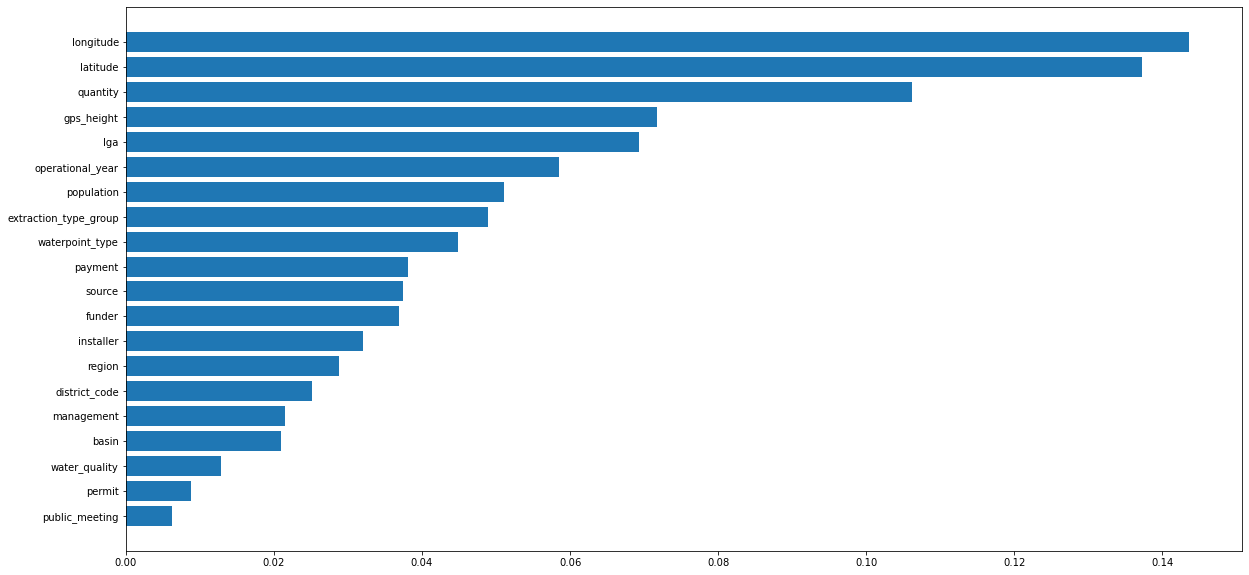

In [47]:
sorted_idx = clf_rf1.feature_importances_.argsort()
plt.figure(figsize=(20, 10))
plt.barh(X_train.columns[sorted_idx], clf_rf1.feature_importances_[sorted_idx])

From the above plot it is seen that the feaures such as 'permit' & 'public_meeting' are least important. lets remove them. 

In [52]:
X_train.drop(columns=['permit', 'public_meeting'], inplace=True )
X_test.drop(columns=['permit', 'public_meeting'], inplace=True )

In [53]:
clf_rf2 = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, criterion= 'gini',min_samples_split= 5,
                                class_weight='balanced')
clf_rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=150, n_jobs=-1, random_state=42)

##### 5.2.4.2 Checking performance of RandomForest after removing least important features

In [54]:
# making predictions on test set
y_pred_train = clf_rf2.predict(X_train)
y_pred_train_proba = clf_rf2.predict_proba(X_train)
# making predictions on test set
y_pred_test = clf_rf2.predict(X_test)
y_pred_test_proba = clf_rf2.predict_proba(X_test)

# printing the result
print("Accuracy:")
print("*"*50)
print("Train:", accuracy_score(y_train, y_pred_train))
print("Test:", accuracy_score(y_test, y_pred_test))

print("\nBalanced Accuracy:")
print("*"*50)
print("Train:", balanced_accuracy_score(y_train, y_pred_train))
print("Test:", balanced_accuracy_score(y_test, y_pred_test))

print("\nF1_score:")
print("*"*50)
print("Train:",f1_score(y_train, y_pred_train, average="weighted"))
print("Test:",f1_score(y_test, y_pred_test, average="weighted"))

print("\nroc_auc_score:")
print("*"*50)
print("Train:", roc_auc_score(y_train, y_pred_train_proba, multi_class='ovr'))
print("Test:", roc_auc_score(y_test, y_pred_test_proba, multi_class='ovr'))

Accuracy:
**************************************************
Train: 0.9678451178451178
Test: 0.8032828282828283

Balanced Accuracy:
**************************************************
Train: 0.9749178404127838
Test: 0.6967651220798095

F1_score:
**************************************************
Train: 0.9681619397959844
Test: 0.8014343733709647

roc_auc_score:
**************************************************
Train: 0.9967410532279221
Test: 0.9022438622306468


From some of the above results, its seen that the models are overfitting due to imbalance in data. Lets try an oversampling technique called 'SMOTE' to deal with imbalance.

##### 5.2.4.3 SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
smote1 = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_smote_train, y_smote_train = smote1.fit_resample(X_train, y_train)
y_smote_train = pd.Series(y_smote_train)
print(y_train.value_counts())
print("\nAfter applying SMOTE")
print(y_smote_train.value_counts())

1    25790
0    18317
2     3413
Name: status_group, dtype: int64

After applying SMOTE
1    25790
0    25790
2    25790
Name: status_group, dtype: int64


In [57]:
smote2 = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_smote_test, y_smote_test = smote2.fit_resample(X_test, y_test)
y_smote_test = pd.Series(y_smote_test)
print(y_test.value_counts())
print("\nAfter applying SMOTE")
print(y_smote_test.value_counts())

1    6469
0    4507
2     904
Name: status_group, dtype: int64

After applying SMOTE
1    6469
0    6469
2    6469
Name: status_group, dtype: int64


##### 5.2.4.4 Recheckig performance after applying 'SMOTE' technique

In [58]:
clf_rf3 = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, criterion= 'gini',min_samples_split= 5,
                                class_weight='balanced')
clf_rf3.fit(X_smote_train, y_smote_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [59]:
# making predictions on test set
y_pred_train = clf_rf3.predict(X_smote_train)
y_pred_train_proba = clf_rf3.predict_proba(X_smote_train)
# making predictions on test set
y_pred_test = clf_rf3.predict(X_smote_test)
y_pred_test_proba = clf_rf3.predict_proba(X_smote_test)

# printing the result
print("Accuracy:")
print("*"*50)
print("Train:", accuracy_score(y_smote_train, y_pred_train))
print("Test:", accuracy_score(y_smote_test, y_pred_test))

print("\nBalanced Accuracy:")
print("*"*50)
print("Train:", balanced_accuracy_score(y_smote_train, y_pred_train))
print("Test:", balanced_accuracy_score(y_smote_test, y_pred_test))

print("\nF1_score:")
print("*"*50)
print("Train:",f1_score(y_smote_train, y_pred_train, average="weighted"))
print("Test:",f1_score(y_smote_test, y_pred_test, average="weighted"))

print("\nroc_auc_score:")
print("*"*50)
print("Train:", roc_auc_score(y_smote_train, y_pred_train_proba, multi_class='ovr'))
print("Test:", roc_auc_score(y_smote_test, y_pred_test_proba, multi_class='ovr'))

Accuracy:
**************************************************
Train: 0.9787643789582525
Test: 0.8071314474158808

Balanced Accuracy:
**************************************************
Train: 0.9787643789582526
Test: 0.8071314474158808

F1_score:
**************************************************
Train: 0.978774218498059
Test: 0.8074066807360177

roc_auc_score:
**************************************************
Train: 0.9988996783958562
Test: 0.9352664259237544


From above result after applying SMOTE, it is seen that the overfitting problem has been reduced to some extent 

In [ ]:
# clf_xgb = XGBClassifier(booster='gbtree', colsample_bylevel=1,
#        colsample_bynode=1, colsample_bytree=1, learning_rate=0.1,
#        max_depth=10, min_child_weight=1,n_estimators=100, n_jobs=-1,
#        objective='multi:softprob', random_state=0,verbosity=1) 

In [61]:
from xgboost import XGBClassifier
clf_xgb =XGBClassifier()
clf_xgb.fit(X_smote_train, y_smote_train)

[23:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [62]:
# making predictions on test set
y_pred_train = clf_xgb.predict(X_smote_train)
y_pred_train_proba = clf_xgb.predict_proba(X_smote_train)
# making predictions on test set
y_pred_test = clf_xgb.predict(X_smote_test)
y_pred_test_proba = clf_xgb.predict_proba(X_smote_test)

# printing the result
print("Accuracy:")
print("*"*50)
print("Train:", accuracy_score(y_smote_train, y_pred_train))
print("Test:", accuracy_score(y_smote_test, y_pred_test))

print("\nBalanced Accuracy:")
print("*"*50)
print("Train:", balanced_accuracy_score(y_smote_train, y_pred_train))
print("Test:", balanced_accuracy_score(y_smote_test, y_pred_test))

print("\nF1_score:")
print("*"*50)
print("Train:",f1_score(y_smote_train, y_pred_train, average="weighted"))
print("Test:",f1_score(y_smote_test, y_pred_test, average="weighted"))

print("\nroc_auc_score:")
print("*"*50)
print("Train:", roc_auc_score(y_smote_train, y_pred_train_proba, multi_class='ovr'))
print("Test:", roc_auc_score(y_smote_test, y_pred_test_proba, multi_class='ovr'))

Accuracy:
**************************************************
Train: 0.8624272974020938
Test: 0.8114082547534395

Balanced Accuracy:
**************************************************
Train: 0.8624272974020938
Test: 0.8114082547534395

F1_score:
**************************************************
Train: 0.8621542054573937
Test: 0.8107848004014945

roc_auc_score:
**************************************************
Train: 0.9661977455284911
Test: 0.9390995537393089


### 5.3 Using Leave One Out Encoding Encoder for encoding categorical features

In [66]:
numerical_features1 = ['gps_height','longitude', 'latitude', 'district_code','population', 'operational_year']
categorical_features1 = ['funder','installer','basin', 'region', 'lga', 'extraction_type_group','management', 
                        'payment', 'water_quality', 'quantity', 'source','waterpoint_type']

In [65]:
df1.drop(columns=['permit', 'public_meeting'], inplace=True )

In [67]:
y1=df1['status_group']
X1 = df1.drop(columns = ['status_group'])

In [68]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=40)

In [72]:
scaler2 = RobustScaler()
encoder2 = ce.LeaveOneOutEncoder()

In [73]:
transformer2 = scaler2.fit(X_train1[numerical_features1])

X_train1[numerical_features1] = transformer2.transform(X_train1[numerical_features1])
X_test1[numerical_features1] = transformer2.transform(X_test1[numerical_features1])

transformer_loe_1 = encoder2.fit(X_train1[categorical_features1], y_train1)

X_train1[categorical_features1] = transformer_loe_1.transform(X_train1[categorical_features1])
X_test1[categorical_features1] = transformer_loe_1.transform(X_test1[categorical_features1])

In [75]:
smote1 = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_smote_train, y_smote_train = smote1.fit_resample(X_train1, y_train1)
y_smote_train = pd.Series(y_smote_train)
print(y_train.value_counts())
print("\nAfter applying SMOTE")
print(y_smote_train.value_counts())

1    25790
0    18317
2     3413
Name: status_group, dtype: int64

After applying SMOTE
1    25790
0    25790
2    25790
Name: status_group, dtype: int64


In [76]:
smote2 = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_smote_test, y_smote_test = smote2.fit_resample(X_test1, y_test1)
y_smote_test = pd.Series(y_smote_test)
print(y_test.value_counts())
print("\nAfter applying SMOTE")
print(y_smote_test.value_counts())

1    6469
0    4507
2     904
Name: status_group, dtype: int64

After applying SMOTE
1    6469
0    6469
2    6469
Name: status_group, dtype: int64


In [77]:
from xgboost import XGBClassifier
clf_xgb1 =XGBClassifier()
clf_xgb1.fit(X_smote_train, y_smote_train)

[01:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [78]:
# making predictions on test set
y_pred_train = clf_xgb1.predict(X_smote_train)
y_pred_train_proba = clf_xgb1.predict_proba(X_smote_train)
# making predictions on test set
y_pred_test = clf_xgb1.predict(X_smote_test)
y_pred_test_proba = clf_xgb1.predict_proba(X_smote_test)

# printing the result
print("Accuracy:")
print("*"*50)
print("Train:", accuracy_score(y_smote_train, y_pred_train))
print("Test:", accuracy_score(y_smote_test, y_pred_test))

print("\nBalanced Accuracy:")
print("*"*50)
print("Train:", balanced_accuracy_score(y_smote_train, y_pred_train))
print("Test:", balanced_accuracy_score(y_smote_test, y_pred_test))

print("\nF1_score:")
print("*"*50)
print("Train:",f1_score(y_smote_train, y_pred_train, average="weighted"))
print("Test:",f1_score(y_smote_test, y_pred_test, average="weighted"))

print("\nroc_auc_score:")
print("*"*50)
print("Train:", roc_auc_score(y_smote_train, y_pred_train_proba, multi_class='ovr'))
print("Test:", roc_auc_score(y_smote_test, y_pred_test_proba, multi_class='ovr'))

Accuracy:
**************************************************
Train: 0.8592865451725475
Test: 0.8106353377647241

Balanced Accuracy:
**************************************************
Train: 0.8592865451725475
Test: 0.8106353377647241

F1_score:
**************************************************
Train: 0.8589568631252777
Test: 0.8099731365985003

roc_auc_score:
**************************************************
Train: 0.9655189116837996
Test: 0.9398856334561517


### Summary of results

In [80]:
pip install prettytable

In [90]:
from prettytable import PrettyTable
table = PrettyTable()
table.title = " Summary "
table.field_names = ['Scaler','Encoder', 'Model','BalAcc_train', 'BalAcc_test','F1_train','F1_test','roc_train','roc_test']

table.add_row(["Robust","TE","LR", '0.6051', '0.6032', '0.6565', '0.6556', '0.7912', '0.7910' ])
table.add_row(["Robust","TE","KNN", '0.6941', '0.6108', '0.8233', '0.7490', '0.9467', '0.8311' ])
table.add_row(["Robust","TE","DT", '0.5519', '0.5529', '0.6757', '0.6768', '0.7304', '0.7299' ])
table.add_row(["Robust","TE","RF", '0.9738', '0.7031', '0.9667', '0.8034', '0.9967', '0.9032' ])
table.add_row(["Robust","TE+SMOTE","RF", '0.9787', '0.8071', '0.9787', '0.8074', '0.9988', '0.9352'])
table.add_row(["Robust","TE+SMOTE","Xgb", '0.8624', '0.8114', '0.8621', '0.8107', '0.9661', '0.9390'])
table.add_row(["Robust","LOO+SMOTE","Xgb", '0.8592', '0.8106', '0.8589', '0.8099', '0.9655', '0.9398'])
print(table)

+-----------------------------------------------------------------------------------------------------+
|                                               Summary                                               |
+--------+-----------+-------+--------------+-------------+----------+---------+-----------+----------+
| Scaler |  Encoder  | Model | BalAcc_train | BalAcc_test | F1_train | F1_test | roc_train | roc_test |
+--------+-----------+-------+--------------+-------------+----------+---------+-----------+----------+
| Robust |     TE    |   LR  |    0.6051    |    0.6032   |  0.6565  |  0.6556 |   0.7912  |  0.7910  |
| Robust |     TE    |  KNN  |    0.6941    |    0.6108   |  0.8233  |  0.7490 |   0.9467  |  0.8311  |
| Robust |     TE    |   DT  |    0.5519    |    0.5529   |  0.6757  |  0.6768 |   0.7304  |  0.7299  |
| Robust |     TE    |   RF  |    0.9738    |    0.7031   |  0.9667  |  0.8034 |   0.9967  |  0.9032  |
| Robust |  TE+SMOTE |   RF  |    0.9787    |    0.8071   |  0.9

Form the above summary, it is understood that the model 'XGBClassifier' with robust_scaler, Target_Encoder & SMOTE technique has been the best performer so far with the highest F1_score & Balanced_Accuracy as 0.81 with minimum overfitting.